## Import common libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display, HTML
%matplotlib inline

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [5]:
# read csv file
yelp = pd.read_csv('yelp_training_set_review(with text_length and transformed)-new.csv')

In [6]:
# make sure the text column is type string
yelp['text_transformed'] = yelp['text_transformed'].astype('str')
yelp[['stars','text_transformed','funny', 'text_length']].head()

,stars,text_transformed,funny,text_length
0,5,wife took birthday breakfast excellent weather...,0,77
1,5,idea people give bad reviews place goes show p...,0,111
2,4,love gyro plate Rice good also dig candy selec...,0,9
3,5,Rosie Dakota LOVE Chaparral Dog Park convenien...,0,44
4,5,General Manager Scott Petello good egg go deta...,0,38


### Lets focus for now on star 1 and 5 only.

In [16]:
yelp_class = yelp[(yelp.stars==1) | (yelp.stars==5)].copy()
yelp_class.dropna(inplace=True)
yelp_class = yelp_class.sample(frac=0.8, random_state=101)
X = yelp_class['text_transformed']
y = yelp_class['stars']
len(yelp_class)

74966

In [8]:
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC,LinearSVC
from sklearn.preprocessing import StandardScaler

### Training a Support Vector Machine classifier and report cross-validated score

In [9]:
compare_models = {}
def lscv_model(X_train, X_test, y_train, y_test, model_name):
    '''
    train a scv model and return cross-validated score
    '''
    svm = LinearSVC(max_iter=100000)
    svm.fit(X_train,y_train)
    #scores = cross_val_score(svm, X_train, y_train, cv=5)
    y_pred_svm = svm.predict(X_test)
    compare_models[model_name] = {'mean':svm.score(X_test,y_test)}
    #compare_models[model_name]['cv_score'] = f'mean:{round(scores.mean(),5)}±{round(scores.std(),5)}'
    for i in ['1','5']:
        compare_models[model_name][i]=classification_report(y_test,y_pred_svm,output_dict=True)[i]['f1-score']

## 1. Features engineering
Whether features in addition to text itself would be usefull?
## 2. Data imbalance
How to balance the data to overcome biased prediction?
## 3. Skewed distribution
Whether unskewing distribution improve accuracy?
## 4. Effect of n-grams
Whether including phases improve the mode as compared to just words?
## 5. Effect of tf-idf
Whether too frequent words introducing too much noise?
## 6. Tuning hyperparameters
How to find the optimal hyperparameters?

## 1. Features engineering: compare text-only vs text+funny+text_length

In [17]:
cv = CountVectorizer()
X_vector = cv.fit_transform(X)

In [8]:
compare_models = {}
X_train, X_test, y_train, y_test = train_test_split(X_vector, y, test_size=0.3, random_state=1)
lscv_model(X_train, X_test, y_train, y_test,'LSVC')
print(pd.DataFrame(compare_models))

                          LSVC
1                     0.861988
5                     0.969196
cv_score  mean:0.94771±0.00178
mean                  0.949634


In [18]:
X_all_features = pd.DataFrame.sparse.from_spmatrix(X_vector,columns=cv.get_feature_names())
X_all_features.head()

,aa,aaa,aaaa,aaaaa,aaaaaa,aaaaaaaaaaaamaaaaaaaaaaaazzzzzzzzzzzzzzeeeeeeeeeeee,aaaaaaaaaaack,aaaaaaaaaahhhhhhhhhhhhhhh,aaaaaaah,aaaaaaahhh,...,ça,çarradinhas,çe,éclairs,école,élysées,ém,étouffée,über,überraschungseier
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(yelp_class[['text_length', 'funny']])
X_all_features[['text_length', 'funny']] = pd.DataFrame(X_scaled)
#X_all_features[['text_length', 'funny']] = yelp_class[['text_length', 'funny']].reset_index().drop(['index'],axis=1)
X_all_features.head()

,aa,aaa,aaaa,aaaaa,aaaaaa,aaaaaaaaaaaamaaaaaaaaaaaazzzzzzzzzzzzzzeeeeeeeeeeee,aaaaaaaaaaack,aaaaaaaaaahhhhhhhhhhhhhhh,aaaaaaah,aaaaaaahhh,...,çarradinhas,çe,éclairs,école,élysées,ém,étouffée,über,überraschungseier,text_length
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.485804
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.503797
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.971608
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.305876
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.899637


In [20]:
compare_models = {}
for i,j in zip([X_all_features.drop(['text_length', 'funny'], axis=1),
                X_all_features.drop(['funny'], axis=1),
                X_all_features], ['Text','Text+text_length','Text+text_length+funny']):
    X_train, X_test, y_train, y_test = train_test_split(i, y, test_size=0.3, random_state=1)
    lscv_model(X_train, X_test, y_train, y_test,j)

,Text,Text+text_length,Text+text_length+funny
mean,0.953046,0.953179,0.952512
1,0.876231,0.876568,0.874912
5,0.971027,0.971110,0.970693


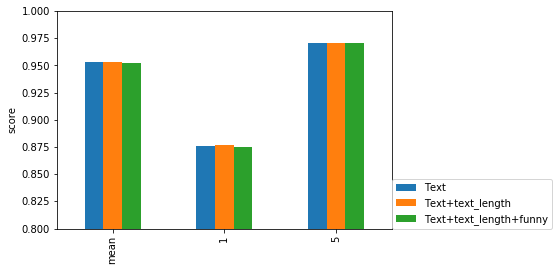

In [21]:
#pd.DataFrame(compare_models).drop(columns='cv_score').plot(kind='bar', ylim=[0.8,1.0])
pd.DataFrame(compare_models).plot(kind='bar', ylim=[0.8,1.0])
plt.legend(loc=(1,0))
plt.ylabel('score')
pd.DataFrame(compare_models)

## 2. Data imbalance
- ### Oversampling and Undersampling

Text(0.5, 1.0, 'ratings counts')

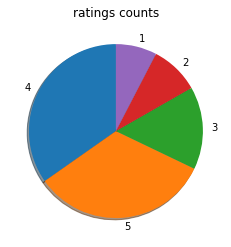

In [0]:
plt.pie(yelp['stars'].value_counts(), 
        labels=yelp['stars'].value_counts().index,
        shadow=True, startangle=90)
plt.title('ratings counts')

In [0]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN,  BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,LSVC,LSVC + RandomOverSampler,LSVC + SMOTE,LSVC + ADASYN,LSVC + BorderlineSMOTE,LSVC + RandomUnderSampler
mean,0.955323,0.926054,0.952906,0.951924,0.956439,0.932768
1,0.878718,0.922804,0.953013,0.952332,0.956586,0.932755
5,0.972618,0.929041,0.952797,0.951510,0.956291,0.932781


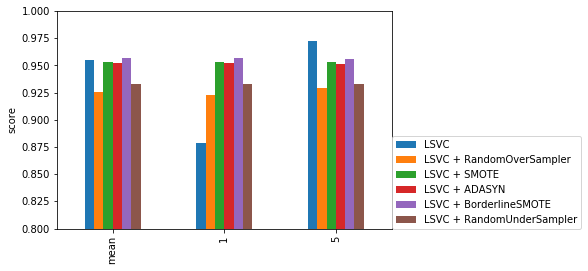

In [0]:
compare_models = {}
X_train, X_test, y_train, y_test = train_test_split(X_vector, y, test_size=0.3, random_state=101)
lscv_model(X_train, X_test, y_train, y_test,'LSVC')
for method in [RandomOverSampler, SMOTE, ADASYN,  BorderlineSMOTE, RandomUnderSampler]:    
    ros = method(random_state=5)
    X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
    X_resampled_test, y_resampled_test = ros.fit_resample(X_test, y_test)
    lscv_model(X_resampled, X_resampled_test, y_resampled, y_resampled_test,'LSVC + ' + ros.__class__.__name__)
pd.DataFrame(compare_models).plot(kind='bar', ylim=[0.8,1.0])
plt.legend(loc=(1,0))
plt.ylabel('score')
pd.DataFrame(compare_models)

## 3. Skewed distribution: 
Box-Cox Transformation and Yeo-Johnson Transformation

In [22]:
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

,LSVC,LSVC + Yeo-Johnson
mean,0.953268,0.955269
1,0.874866,0.880352
5,0.971269,0.972493


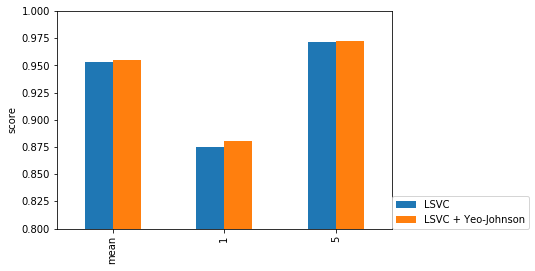

In [24]:
compare_models = {}

pt = QuantileTransformer() 
X_vector_TF = pt.fit_transform(X_vector)
for i,j in zip([X_vector,X_vector_TF],['LSVC','LSVC + Yeo-Johnson']):
    X_train, X_test, y_train, y_test = train_test_split(i, y, test_size=0.3, random_state=101)
    lscv_model(X_train, X_test, y_train, y_test, j)

pd.DataFrame(compare_models).plot(kind='bar', ylim=[0.8,1.0])
plt.legend(loc=(1,0))
plt.ylabel('score')
pd.DataFrame(compare_models)

## 4. Effect of n-grams

,"LSVC +(1, 1)","LSVC +(1, 2)","LSVC +(2, 2)"
mean,0.949918,0.954400,0.909725
1,0.863619,0.874486,0.706590
5,0.969327,0.972139,0.946656


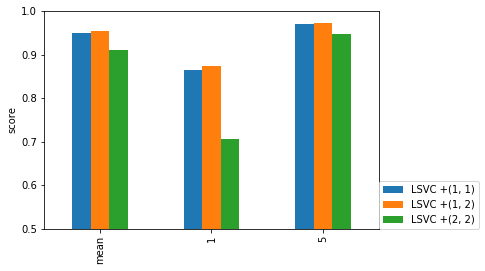

In [0]:
compare_models = {}
for i in [(1,1) ,(1,2), (2,2)]:
    cv = CountVectorizer(ngram_range=i)
    X_vector = cv.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_vector, y, test_size=0.3, random_state=101)
    lscv_model(X_train, X_test, y_train, y_test, f'LSVC +{i}')
pd.DataFrame(compare_models).plot(kind='bar', ylim=[0.5,1.0])
plt.legend(loc=(1,0))
plt.ylabel('score')
pd.DataFrame(compare_models)

## 5. Effect of Tf-idf

In [0]:
from sklearn.feature_extraction.text import TfidfTransformer

/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,"LSVC + (1,2)",LSVC + tdidf
mean,0.954400,0.959522
1,0.874486,0.882121
5,0.972139,0.975566


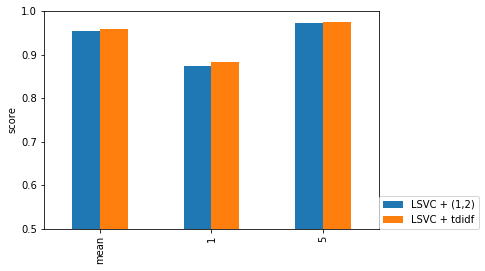

In [0]:
compare_models = {}
cv = CountVectorizer(ngram_range=(1,2))
X_vector = cv.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_vector, y, test_size=0.3, random_state=101)
lscv_model(X_train, X_test, y_train, y_test, 'LSVC + (1,2)')


tfidf = TfidfTransformer()
X_vector_tdidf = tfidf.fit_transform(X_vector,y)
X_train, X_test, y_train, y_test = train_test_split(X_vector_tdidf, y, test_size=0.3, random_state=101)
lscv_model(X_train, X_test, y_train, y_test, f'LSVC + tdidf')
pd.DataFrame(compare_models).plot(kind='bar', ylim=[0.5,1.0])
plt.legend(loc=(1,0))
plt.ylabel('score')
pd.DataFrame(compare_models)

## 6. Tuning hyperparameters

In [0]:
from pprint import pprint
from time import time
import logging

from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [0]:
pipeline = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1,2))),
    ('oversample', BorderlineSMOTE()),
    ('unskewed', QuantileTransformer()),
    ('tfidf', TfidfTransformer()),
    ('svm', SVC())
])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
parameters = {
    'vect__max_df': (0.5, 0.75, 1.0),    
    'svm__C': [10,20,50,70]
}

In [0]:
if __name__ == "__main__":
    # multiprocessing requires the fork to happen in a __main__ protected
    # block

    # find the best parameters for both the feature extraction and the
    # classifier
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=10, verbose=1)

    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    pprint(parameters)
    t0 = time()
    grid_search.fit(X_train, y_train)
    print("done in %0.3fs" % (time() - t0))
    print()

    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['vect', 'oversample', 'unskewed', 'tfidf', 'svm']
parameters:
{'svm__C': [10, 20, 50, 70], 'vect__max_df': (0.5, 0.75, 1.0)}
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed: 168.0min
[Parallel(n_jobs=10)]: Done  60 out of  60 | elapsed: 336.6min finished


done in 24682.233s

Best score: 0.962
Best parameters set:
	svm__C: 20
	vect__max_df: 1.0


## Export the model as joblid file for deployment

In [0]:
import pickle
import joblib

In [0]:
pipeline = Pipeline([
    ('vect', HashingVectorizer(ngram_range=(1,2), alternate_sign=False)),
    ('oversample', BorderlineSMOTE()),
    #('unskewed', QuantileTransformer()),
    ('tfidf', TfidfTransformer()),
    ('svm', SVC(C=20))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

pipeline.fit(X_train,y_train)

compare_models = {}
model_name = 'best model'
compare_models[model_name] = {'mean':pipeline.score(X_test,y_test)}
y_pred = pipeline.predict(X_test)
for i in ['1','5']:
    compare_models[model_name][i]=classification_report(y_test,y_pred,output_dict=True)[i]['f1-score']
    
joblib.dump(pipeline, 'model_svm.joblib')     
#pickle.dump(pipeline, open('model_svm_hash.pkl','wb'), protocol=4) # for saving big file

#model = pickle.load(open('model_svm_hash.pkl','rb'))
model = joblib.load('model_svm.joblib')

model_name ='best model pickel'
compare_models[model_name] = {'mean':model.score(X_test,y_test)}
y_pred_svm_pl = model.predict(X_test)
for i in ['1','5']:
    compare_models[model_name][i]=classification_report(y_test,y_pred_svm_pl,output_dict=True)[i]['f1-score']
    
pd.DataFrame(compare_models)

,best model,best model pickel
mean,0.960872,0.960872
1,0.885584,0.885584
5,0.976401,0.976401


## Automatic ML with TPOT

In [0]:
from tpot import TPOTClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_vector, y, test_size=0.3, random_state=101)
pipeline_optimizer = TPOTClassifier(generations=20, verbosity=2, config_dict='TPOT sparse', n_jobs=-1)
pipeline_optimizer.fit(X_train, y_train)
print(pipeline_optimizer.score(X_test, y_test))
pipeline_optimizer.export('tpot_exported_pipeline.py')

Warning: xgboost.XGBClassifier is not available and will not be used by TPOT.
HBox(children=(FloatProgress(value=0.0, description='Optimization Progress', max=2100.0, style=ProgressStyle(d…
Generation 1 - Current best internal CV score: 0.9612470462687706


TPOT closed during evaluation in one generation.
WARNING: TPOT may not provide a good pipeline if TPOT is stopped/interrupted in a early generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: LogisticRegression(input_matrix, C=1.0, dual=False, penalty=l2)
0.9631842919645716